In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [104]:
# read csv
# df2 = pd.read_csv('go_outside/3.csv')
# df2 = pd.read_csv('sitting/3.csv')
df = pd.read_csv('sitting/3.csv')
df2 = pd.read_csv('walking/4.csv')

In [105]:
def parse_data(data_string):
    return data_string[1:-1].split(',')

In [106]:
df['data'] = df['data'].apply(parse_data)
df2['data'] = df2['data'].apply(parse_data)

In [107]:
df.columns

Index(['type', 'id', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'bandwidth',
       'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi',
       'noise_floor', 'ampdu_cnt', 'channel', 'secondary_channel',
       'local_timestamp', 'ant', 'sig_len', 'rx_state', 'len', 'first_word',
       'data'],
      dtype='object')

In [108]:
all(df['len'] == df['data'].apply(len))
all(df2['len'] == df2['data'].apply(len))

True

In [109]:
CSI_data = df['data']
CSI_data2 = df2['data']

In [110]:
CSI_data = CSI_data.apply(lambda data: [complex(int(data[i]), int(data[i+1])) for i in range(0, len(data), 2)]).to_list()
CSI_data2 = CSI_data2.apply(lambda data2: [complex(int(data2[i]), int(data2[i+1])) for i in range(0, len(data2), 2)]).to_list()


In [111]:
CSI_data = np.array(CSI_data)
CSI_data2 = np.array(CSI_data2)
print(CSI_data.shape, CSI_data.dtype)
print(CSI_data2.shape, CSI_data2.dtype)

(3042, 64) complex128
(2711, 64) complex128


In [112]:
CSI_data.shape

(3042, 64)

In [113]:
from mpl_toolkits import axes_grid1


In [114]:
CSI_amplitude = np.abs(CSI_data)
CSI_amplitude2 = np.abs(CSI_data2)
CSI_amplitude.shape, CSI_amplitude.dtype

((3042, 64), dtype('float64'))

In [115]:
def add_colorbar(im, ax, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(ax)
    width = axes_grid1.axes_size.AxesY(ax, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    cax = divider.new_horizontal(size=width, pad=pad, pack_start=False)
    ax.figure.add_axes(cax)
    return ax.figure.colorbar(im, cax=cax, **kwargs)


def flter_csi_data(csi_data):
    """csi_data not processed"""
    # Assume that the CSI data is stored in a 2D numpy array called csi_data,
    # where each row represents a time sample and each column represents a subcarrier.

    # Identify the subcarriers to prune (e.g., subcarriers with all 0 values)
    subcarriers_to_prune = np.where(~csi_data.any(axis=0))[0]

    # Remove the subcarriers from the data
    pruned_csi_data = np.delete(csi_data, subcarriers_to_prune, axis=1)

    # Verify the results
    print("Original CSI data size:", csi_data.shape)
    print("Pruned CSI data size:", pruned_csi_data.shape)

    csi_data = pruned_csi_data


    # Assume that the CSI data is stored in a numpy array called csi_data.
    # The CSI data should be a 2D array with shape (num_samples, num_subcarriers).

    # Compute the power of each subcarrier
    subcarrier_power = np.square(np.abs(csi_data))
    subcarrier_power = subcarrier_power

    # Compute the noise power by averaging the power over all samples
    noise_power = np.mean(subcarrier_power, axis=1)

    # Compute the SNR of each subcarrier by dividing its power by the noise power
    subcarrier_snr = subcarrier_power / noise_power[:, np.newaxis]

    # # Set a threshold for the minimum SNR value
    # snr_threshold = 0.01

    # Find the subcarriers with SNR values above the threshold
    good_subcarriers = np.where(np.all(subcarrier_snr > 0, axis=0))[0]

    # Filter out the subcarriers with low SNR
    filtered_csi_data = subcarrier_power[:, good_subcarriers]

    # find the best subcarrier
    best_subcarrier = np.argmax(np.mean(filtered_csi_data, axis=0))

    print("Best subcarrier:", best_subcarrier)
    
    print("Original CSI data size:", subcarrier_power.shape)
    print("Filtered CSI data size:", filtered_csi_data.shape)

    return filtered_csi_data, subcarrier_snr, best_subcarrier


In [116]:
import numpy as np


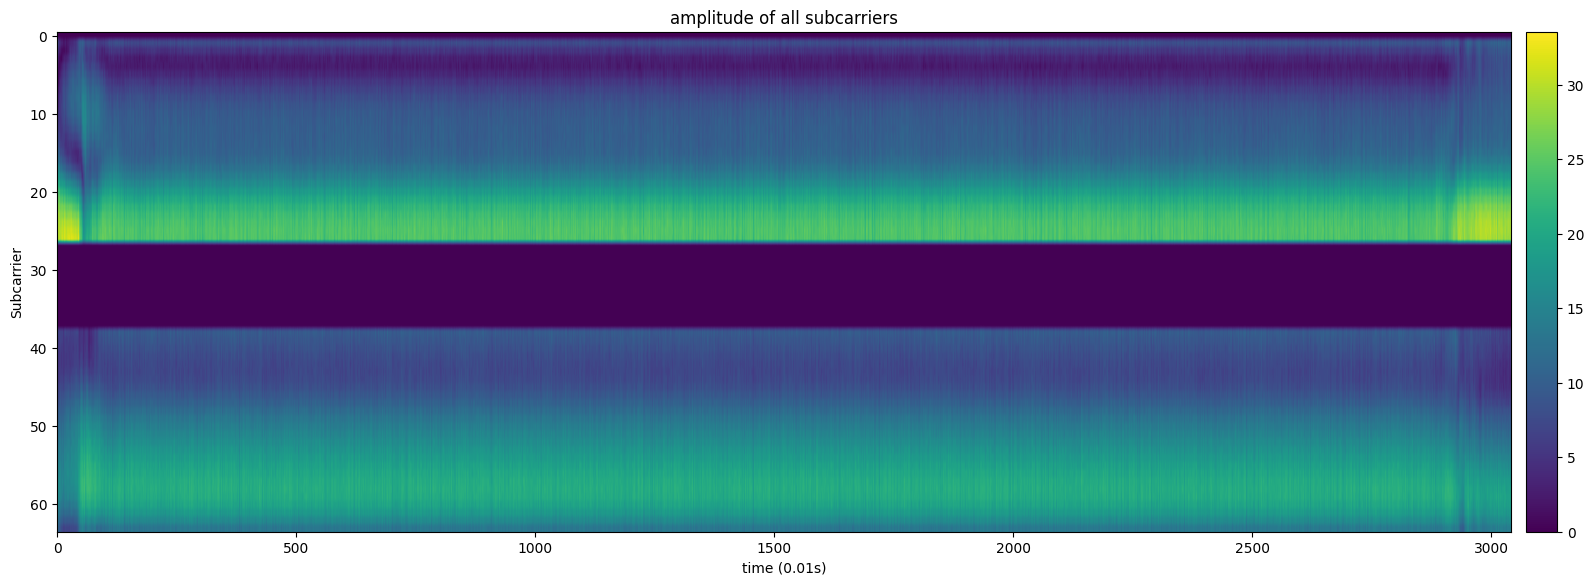

In [117]:
visualize_amp_allsubcarriers = CSI_amplitude


fig, ax1 = plt.subplots(1, 1, figsize=(1, 1))
plt.subplots_adjust(left=0.0, bottom=0.0, top=5, right=15)

im1 = ax1.imshow(visualize_amp_allsubcarriers.transpose(1, 0), aspect='auto')
ax1.set_title('amplitude of all subcarriers')
ax1.set_xlabel('time (0.01s)')
ax1.set_ylabel('Subcarrier')

add_colorbar(im1, ax1, aspect=1)

plt.show()

In [118]:
CSI_amplitude, snr_1, best_subcarrier1 = flter_csi_data(CSI_amplitude)
CSI_amplitude2, snr_2, best_subcarrier1 = flter_csi_data(CSI_amplitude2)

Original CSI data size: (3042, 64)
Pruned CSI data size: (3042, 52)
Best subcarrier: 22
Original CSI data size: (3042, 52)
Filtered CSI data size: (3042, 50)
Original CSI data size: (2711, 64)
Pruned CSI data size: (2711, 52)
Best subcarrier: 33
Original CSI data size: (2711, 52)
Filtered CSI data size: (2711, 36)


In [119]:
from scipy.ndimage import gaussian_filter

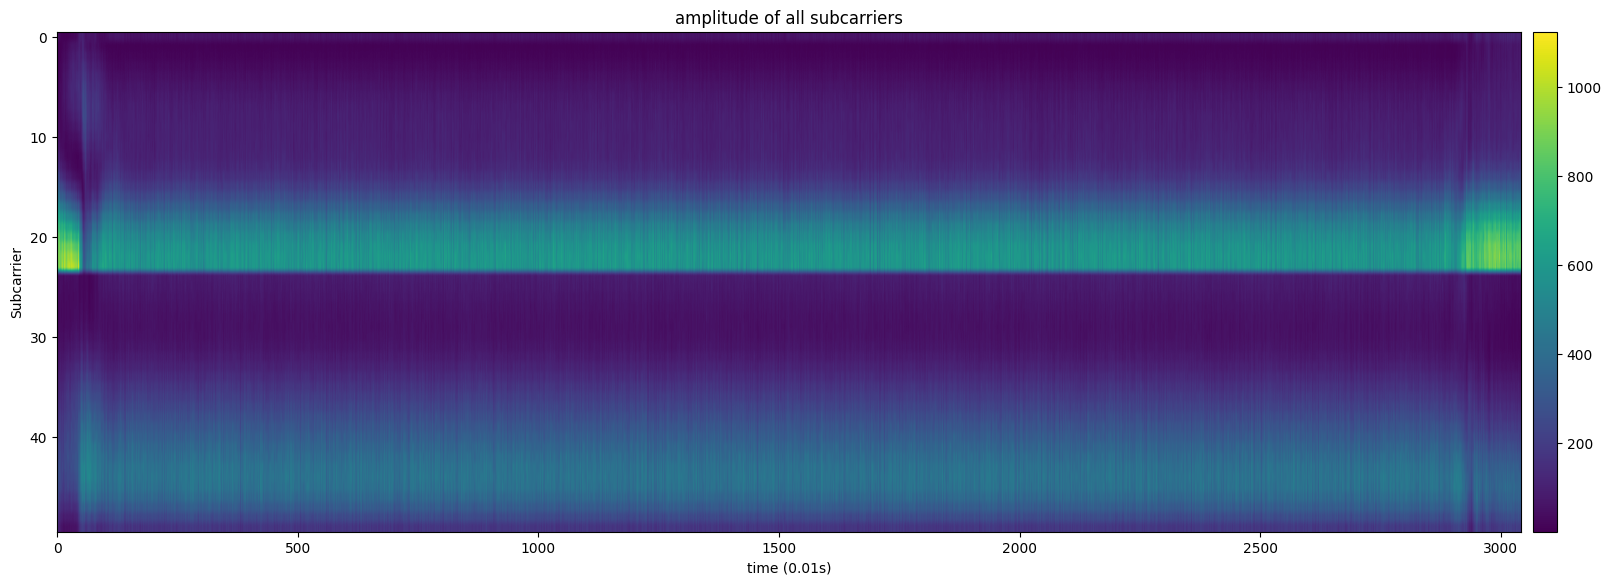

In [120]:
visualize_amp_allsubcarriers = CSI_amplitude


fig, ax1 = plt.subplots(1, 1, figsize=(1, 1))
plt.subplots_adjust(left=0.0, bottom=0.0, top=5, right=15)

im1 = ax1.imshow(visualize_amp_allsubcarriers.transpose(1, 0), aspect='auto')
ax1.set_title('amplitude of all subcarriers')
ax1.set_xlabel('time (0.01s)')
ax1.set_ylabel('Subcarrier')

add_colorbar(im1, ax1, aspect=1)

plt.show()


In [121]:
from statsmodels import api
from scipy.signal import find_peaks, butter, filtfilt

In [122]:
def lowpass_filter(signal, cutoff_freq, fs, order=5):
	# lowpass filter
	b, a = butter(order, cutoff_freq / (fs / 2), btype='lowpass')
	filtered_signal = filtfilt(b, a, signal)

	return filtered_signal

In [123]:
def maximum_ratio_combining(CSI_full):
    "Return weights under Maximum Ratio Combining"
    # use Maximum Ratio Combining
    mss = []
    # calculate the motion statistics from all subcarriers
    for i in range(CSI_full.shape[1]):
        CSI_amplitude = CSI_full[:, i]
        autocorr = api.tsa.stattools.acf(CSI_amplitude, nlags=100 - 1)
        
        mss.append(autocorr[1])
    # print(mss)
    # use Maximum Ratio Combining
    mss = np.array(mss)
    mss = mss / np.sum(mss)
    return mss

def mrc_csi(CSI_full):
    weights = maximum_ratio_combining(CSI_full)
    CSI_full = CSI_full * weights
    CSI_full = np.sum(CSI_full, axis=1)
    return CSI_full

def motion_statistics_after_mrc(CSI_full):
    "Return motion statistics after MRC"
    CSI_full = mrc_csi(CSI_full)
    autocorr = api.tsa.stattools.acf(CSI_full, nlags=100 - 1)
    return autocorr[1]



def motion_detection_score(CSI_amplitude):
    # CSI_amplitude = np.abs(CSI_raw)
    # CSI_amplitude = gaussian_filter1d(CSI_amplitude, 3)**2

    return motion_statistics_after_mrc(CSI_amplitude)

def motion_detection_score_all(CSI_amplitude):
    lag = 1

    # Compute the second value of the autocorrelation function for each subcarrier
    acf_second_value = np.zeros(CSI_amplitude.shape[1])
    for i in range(CSI_amplitude.shape[1]):
        acf_second_value[i] = np.correlate(CSI_amplitude[:-lag, i], CSI_amplitude[lag:, i], mode='valid')[0]
    return acf_second_value / np.max(acf_second_value)


def motion_detection_score_sub1(CSI_amplitude, subcarrier=1):
    # CSI_amplitude = np.abs(CSI_raw)
    # CSI_amplitude = gaussian_filter1d(CSI_amplitude, 3)**2
    CSI_amplitude = CSI_amplitude[:, subcarrier]
    
    autocorr = api.tsa.stattools.acf(CSI_amplitude, nlags=500 - 1)
    motion_statistics = autocorr[1]
    return motion_statistics

def prediction(window_CSI_data, best_subcarrier):
    return motion_detection_score_sub1(window_CSI_data, subcarrier=best_subcarrier)


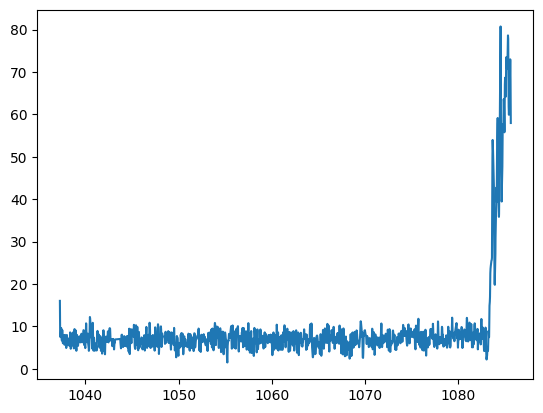

In [124]:
start = 100
end = -1
plt.plot(df['local_timestamp'][start:end]/1000000, lowpass_filter(CSI_amplitude[start:end, 1], 15, 100))


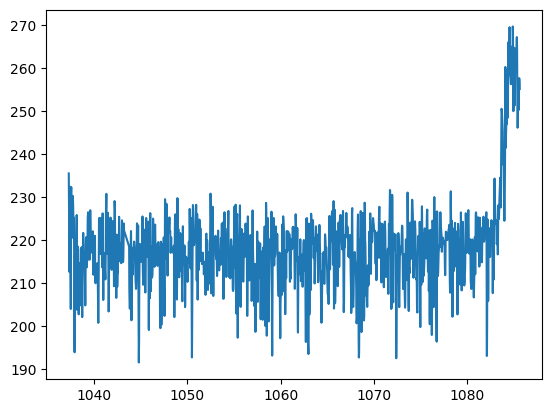

In [125]:
# use lowpass filter after mrc
plt.plot(df['local_timestamp'][start:end]/1000000, lowpass_filter(mrc_csi(CSI_amplitude)[start:end], 15, 100))

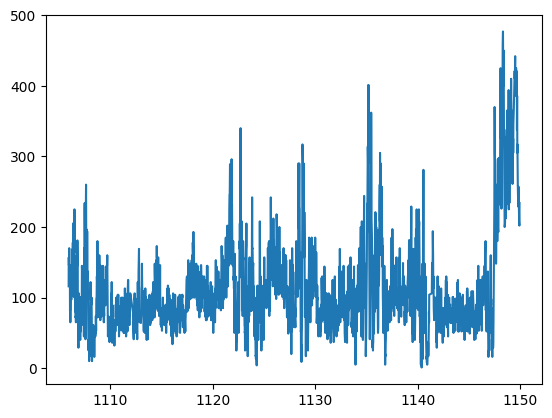

In [126]:
start = 0
end = -1
plt.plot(df2['local_timestamp'][start:end]/1000000, CSI_amplitude2[start:end, 3])

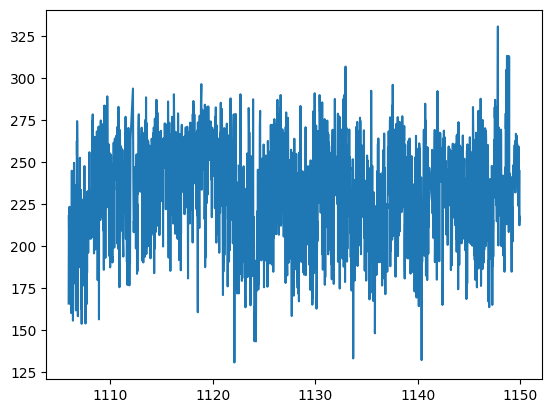

In [127]:

plt.plot(df2['local_timestamp'][start:end]/1000000, mrc_csi(CSI_amplitude2[start:end]))

In [128]:
from scipy.ndimage import gaussian_filter1d

In [129]:
best_subcarrier1

33

0.035059546458041616


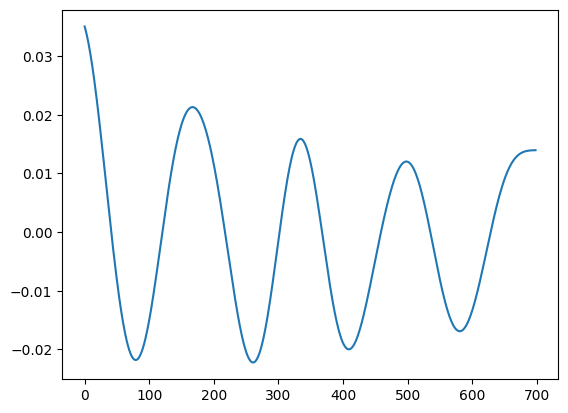

In [130]:
start, end = 500      , 1501
data = CSI_amplitude

autocorr = lowpass_filter(api.tsa.stattools.acf(data[start:end, best_subcarrier1], nlags=700 - 1)[1:], 1, 100)
plt.plot(autocorr[:])
print(autocorr[0])

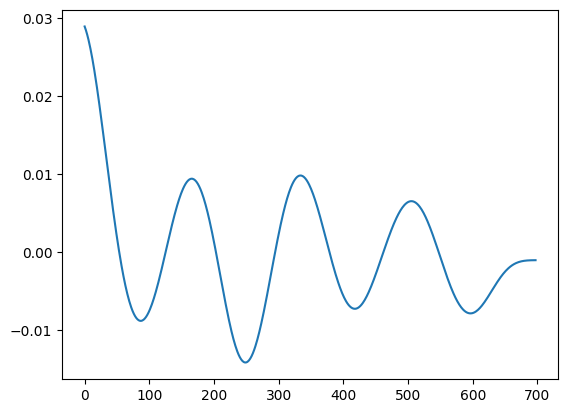

In [131]:
autocorr = lowpass_filter(api.tsa.stattools.acf(mrc_csi(data[start:end]), nlags=700 - 1)[1:], 1, 100)
plt.plot(autocorr[1:])

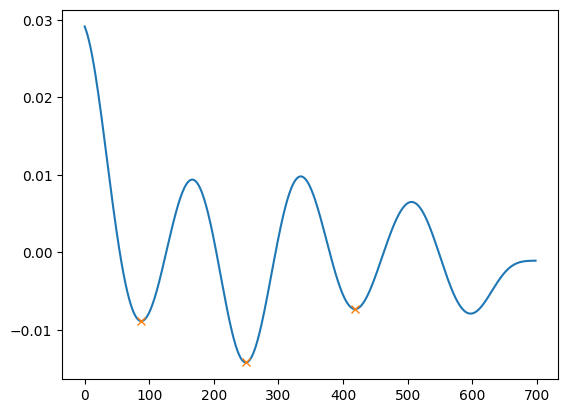

In [132]:
autocorr *= -1
peaks = find_peaks(autocorr, prominence=0.011, width=70)[0]
autocorr *= -1
plt.plot(autocorr[:])
plt.plot(peaks, autocorr[peaks], "x")

In [133]:
motion_detection_score(CSI_data2[:1000, :])

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tools/validation/validation.py:135: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.asarray(obj, dtype=dtype, order=order)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


nan

In [134]:
window_size = 1000
step_size = 500
threshold = 0.1
for i in range(window_size, data.shape[0], step_size):
    # get the window data (last window size data)
    window_CSI_data = data[max(0, i-window_size):i+1, :]
    mrc, sub1 = motion_detection_score(window_CSI_data), motion_detection_score_sub1(window_CSI_data, subcarrier=best_subcarrier1)
    if sub1 < threshold:
        print('no motion', max(0, i-window_size), i+1)
        print(mrc, sub1)


no motion 500 1501
0.03127709768597162 0.04004366723468186
no motion 1000 2001
0.05976963276690647 0.0775014698644459
no motion 1500 2501
0.10758680555647107 0.075069242339742


0.8263054522530929


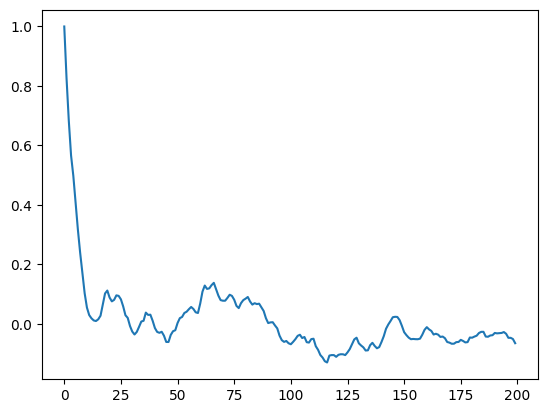

In [135]:
from statsmodels import api
from scipy.signal import find_peaks, butter, filtfilt, argrelextrema

autocorr = api.tsa.stattools.acf(CSI_amplitude2[1400:2000, 1], nlags=200 - 1)
plt.plot(autocorr)
print(autocorr[1])

0.9461692330368936


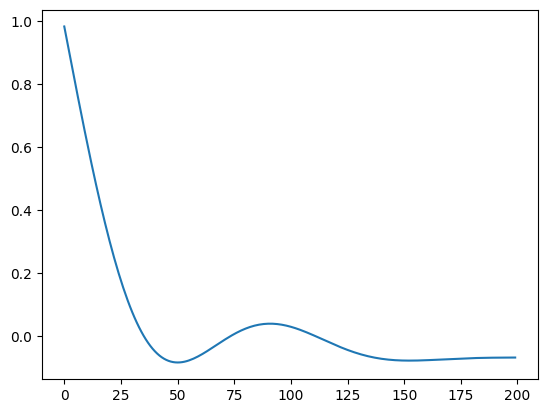

In [136]:
autocorr = lowpass_filter(autocorr, 1, 100)
autocorr *= -1
peaks = find_peaks(autocorr, prominence=0.011, width=70)[0]
autocorr *= -1
plt.plot(autocorr[:])
plt.plot(peaks, autocorr[peaks], "x")
print(autocorr[1])